In [1]:
import cv2
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  
import tensorflow as tf
from glob import glob
from yolov3.yolov4_config import Create_Yolo
from yolov3.utils_config import load_yolo_weights, detect_image, image_preprocess, postprocess_boxes_excel, nms, draw_bbox
from yolov3.configs_config import *
from PIL import Image

import os
import pandas as pd

if YOLO_TYPE == "yolov4":
    Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
if YOLO_TYPE == "yolov3":
    Darknet_weights = YOLO_V3_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V3_WEIGHTS

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

2023-05-26 15:21:39.185608: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-26 15:21:39.185660: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: jh-desktop
2023-05-26 15:21:39.185667: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: jh-desktop
2023-05-26 15:21:39.185790: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.161.3
2023-05-26 15:21:39.185815: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.161.3
2023-05-26 15:21:39.185821: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.161.3
2023-05-26 15:21:39.186093: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructi

In [2]:
nn = int(6)
yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/weight_%d/yolov3_custom" % nn) # use keras weights

# image path

In [ ]:
tr = glob(r"teeth_including_lip_more\train/*.xml")
te = glob(r"teeth_including_lip_more\test/*.xml")
r5 = glob(r"C:\Users\NA_team_1\Desktop\test\*.jpg")

print("train data : {}".format(len(tr)))
print("validation data : {}".format(len(te)))
print("test data {}".format(len(r5)))

In [3]:
r1 = glob(r"teeth_including_lip_more/test/*.jpg")

In [4]:
r11 = glob(r"teeth_including_lip_more/train/*.jpg")

In [5]:
r11 = sorted(r11)
r1 = sorted(r1)

In [ ]:
r5 = glob(r"/home/jh/Desktop/teeth/github_td/test2/*.jpg")

In [ ]:
# # in dahun computer 
# coco_anomaly =  glob(r"C:\Users\NA_team2\TensorFlow-2.x-YOLOv3\TensorFlow-2.x-YOLOv3\val2017/*.jpg")

In [ ]:
coco_anomaly =  glob(r"C:\Users\NA_team_1\Desktop\val2017\*.jpg")
np.random.seed(42)
a = np.random.randint(5000, size =76)
a = np.sort(a)
print(a)
anomaly_76 = [coco_anomaly[i] for i in a]

In [ ]:
coco_center_crop = glob(r"C:\Users\NA_team_1\Desktop\coco_crop\*.jpg")

In [ ]:
# braces =  glob(r"C:\Users\NA_team_1\Desktop\GitHub\TensorFlow-2.x-YOLOv3\braces/*.jpg")

In [ ]:
brace_path = r"braces"

In [ ]:
angled_path = r"angled"

# train

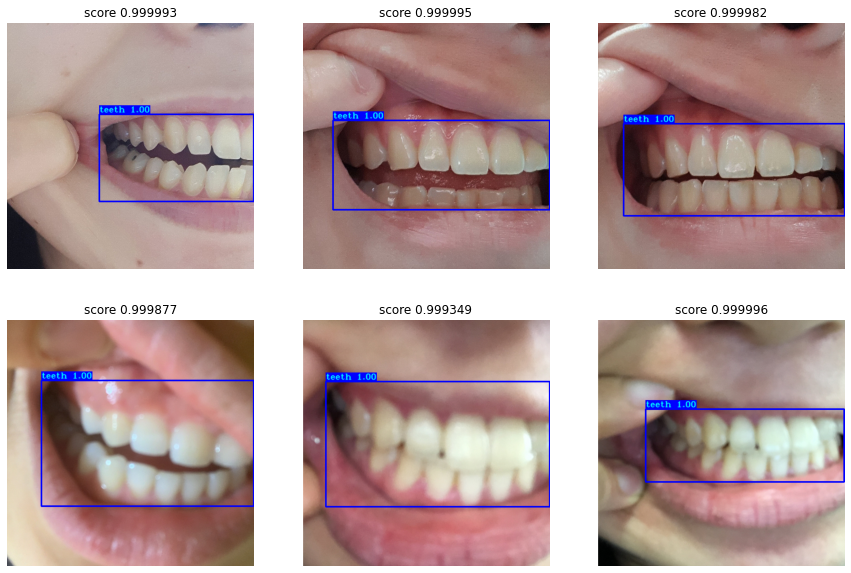

In [6]:
#plt.figure(figsize=(15,30))
#for i in range(18):
#    plt.subplot(6,3,i+1)
plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, r11[i], "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.show()

# validation

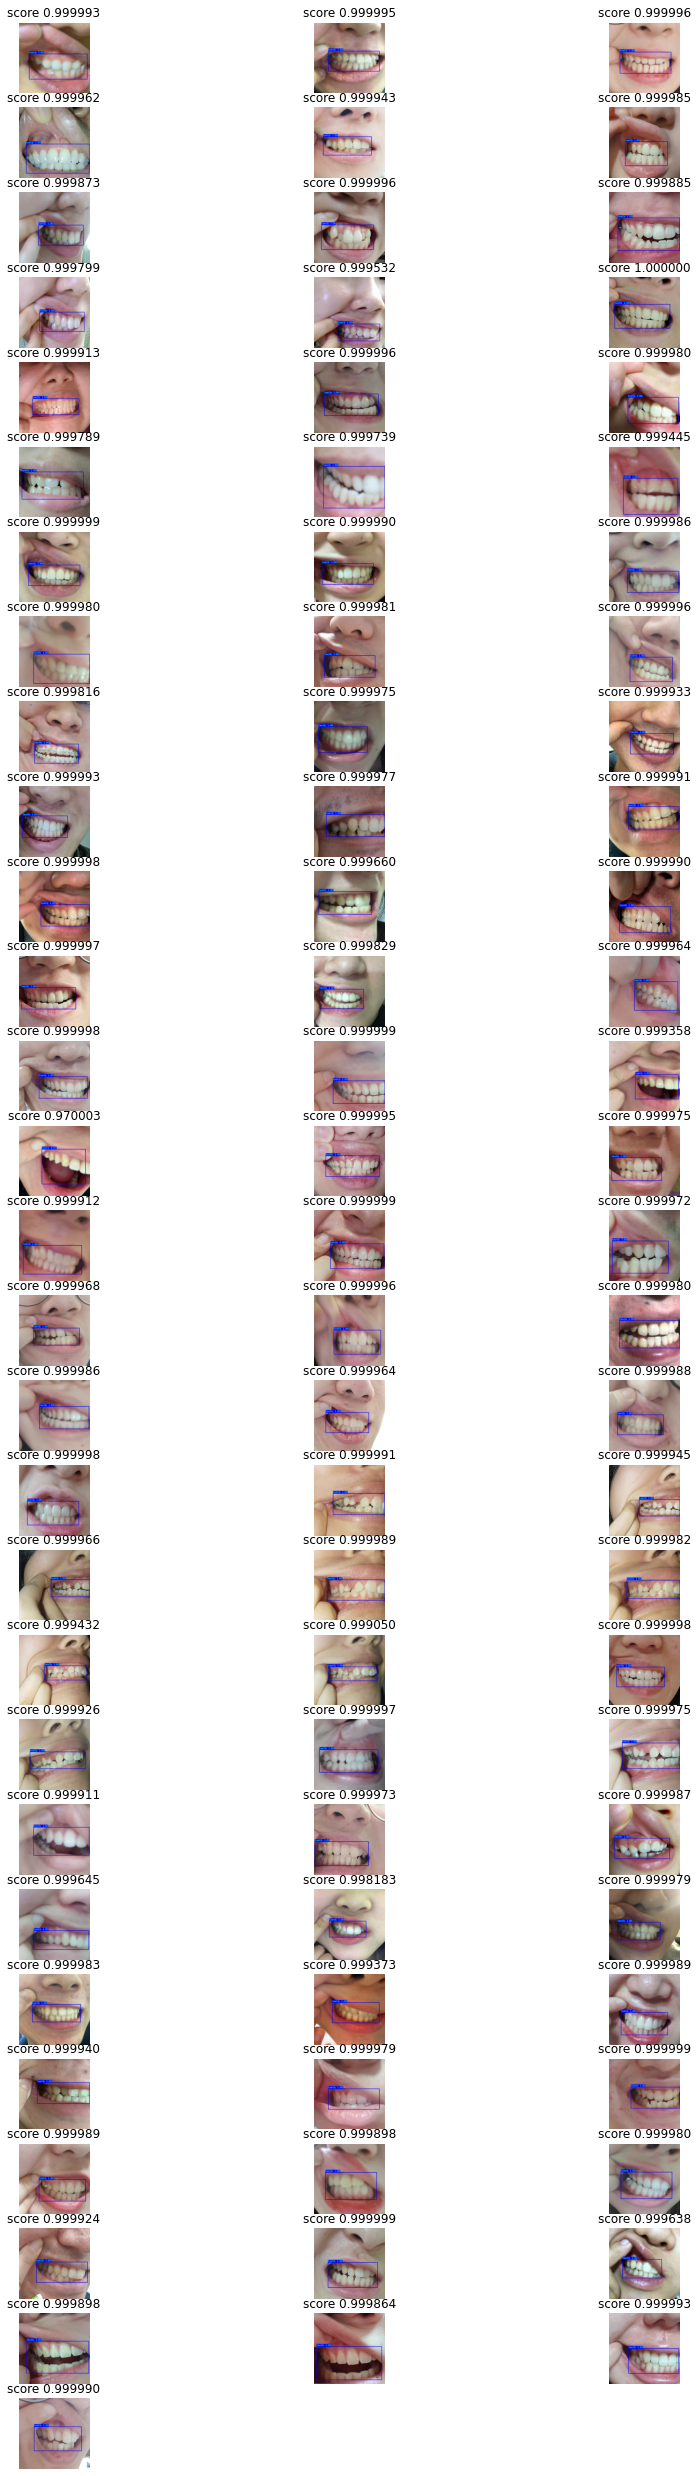

In [7]:
plt.figure(figsize=(15,45))
for i in range(85):
    plt.subplot(29,3,i+1)
# plt.figure(figsize=(15,10))
# for i in range(6):
#     plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, r1[i], "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.show()

## test

In [ ]:
plt.figure(figsize=(15,45))
for i in range(85):
    plt.subplot(29,3,i+1)
# plt.figure(figsize=(15,10))
# for i in range(6):
#     plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, r5[i], "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.show()

# anomaly

In [ ]:
plt.figure(figsize=(15,30))
for i in range(18):
    plt.subplot(7,3,i+1)
# plt.figure(figsize=(15,10))
# for i in range(6):
#     plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, r2[i], "", input_size=YOLO_INPUT_SIZE, show=False, score_threshold = 0.3,CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.show()

# crop anomaly

In [ ]:
plt.figure(figsize=(15,30))
for i in range(len(r3)):
    plt.subplot(5,2,i+1)
    image, bboxes = detect_image(yolo, r3[i], "", input_size=YOLO_INPUT_SIZE, show=False, score_threshold = 0.5 , CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object  \n size: {}'.format(cv2.imread(r3[i]).shape[0:2]))
        plt.axis('off')
    else :
        plt.title('score : {0:2f} \n size: {1} '.format(bboxes[0][4], cv2.imread(r3[i]).shape[0:2]))
        plt.axis('off')
plt.show()

# coco 76

In [ ]:
plt.figure(figsize=(15,60))
for i in range(76):
    plt.subplot(26,3,i+1)
# plt.figure(figsize=(15,10))
# for i in range(6):
#     plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, anomaly_76[i], "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.show()

# coco 76 center crop

In [ ]:
plt.figure(figsize=(15,60))
for i in range(76):
    plt.subplot(26,3,i+1)
# plt.figure(figsize=(15,10))
# for i in range(6):
#     plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, coco_center_crop[i], "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.show()

# braces

In [ ]:
# it contain png files
plt.figure(figsize=(15,30))
for i in range(len(os.listdir(brace_path))):
    plt.subplot(7,3,i+1)
# plt.figure(figsize=(15,10))
# for i in range(6):
#     plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, os.path.join(brace_path, os.listdir(brace_path)[i]), "", input_size=YOLO_INPUT_SIZE, show=False, score_threshold = 0.3,CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.show()

# angle data

In [ ]:
plt.figure(figsize=(15,30))
for i in range(len(os.listdir(angled_path))):
    plt.subplot(7,3,i+1)
# plt.figure(figsize=(15,10))
# for i in range(6):
#     plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, os.path.join(angled_path, os.listdir(angled_path)[i]), "", input_size=YOLO_INPUT_SIZE, show=False, score_threshold = 0.3,CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.show()

# score evaluate

In [ ]:
train_score = [ ]
train_score_i = [ ]
valid_score = []
valid_score_i = []
anomaly_score = []
anomaly_i=[]
center_anomaly_score = []
center_anomaly_i = []

In [ ]:
test_score = []
test_score_i = []

In [ ]:
braces_score = []
braces_i=[]
angle_score = []
angle_i=[]

In [ ]:
full_coco_anomaly_score = []
full_coco_anomaly_i=[]

In [ ]:
full_coco_center_anomaly_score = []
full_coco_center_anomaly_i=[]

In [ ]:
#train 
for i in range(len(r11)):
    image, bboxes = detect_image(yolo, r11[i], "", input_size=YOLO_INPUT_SIZE, show=False, score_threshold = 0.3,CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    train_score.append(bboxes[0][4])
    if train_score[i] < 0.85 :
        train_score_i.append(i)
print("training mean: {0:7f}, var : {1:7f}, min : {2:2f}".format(np.mean(train_score), np.var(train_score), np.min(train_score))  )    

In [ ]:
#validation
for i in range(len(r1)):
    image, bboxes = detect_image(yolo, r1[i], "", input_size=YOLO_INPUT_SIZE, show=False, score_threshold = 0.3, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    valid_score.append(bboxes[0][4])
    if valid_score[i] < 0.85 :
        valid_score_i.append(i)
#     print(i ,bboxes)
print("validation mean: {0:7f}, var : {1:7f}, min : {2:2f}".format(np.mean(valid_score), np.var(valid_score) , np.min(valid_score)))

In [ ]:
#test
for i in range(len(r5)):
    image, bboxes = detect_image(yolo, r5[i], "", input_size=YOLO_INPUT_SIZE, show=False, score_threshold = 0.3, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    test_score.append(bboxes[0][4])
    if test_score[i] < 0.85 :
        test_score_i.append(i)
#     print(i ,bboxes)
print("test mean: {0:7f}, var : {1:7f}, min : {2:2f}".format(np.mean(test_score), np.var(test_score) , np.min(test_score)))

In [ ]:
#anomaly 85
anomaly_85 = anomaly_76 + r2[-9:]
for i in range(len(anomaly_85)):
    image, bboxes = detect_image(yolo, anomaly_85[i], "", input_size=YOLO_INPUT_SIZE, show=False, score_threshold = 0.3,CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    if len(bboxes)!=0:
        anomaly_score.append(bboxes[0][4])
        anomaly_i.append(i)

In [ ]:
#anomaly 85
print("Wrong 85 anomaly set")
# print("The number of wrong",len(full_coco_anomaly_i))
for i in range(len(anomaly_i)):
    print("coco data : {0}, score : {1:4f}".format(anomaly_i[i], anomaly_score[i]))

In [ ]:
#coco anomaly full
for i in range(len(coco_anomaly)):
    image, bboxes = detect_image(yolo, coco_anomaly[i], "", input_size=YOLO_INPUT_SIZE, show=False, score_threshold = 0.3,CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    if len(bboxes)!=0:
        full_coco_anomaly_score.append(bboxes[0][4])
        full_coco_anomaly_i.append(i)

over_anomaly_score = [i for i in full_coco_anomaly_score if i>0.8]
over_anomaly_i = []

for i in range(len(full_coco_anomaly_score)):
    if full_coco_anomaly_score[i] in over_anomaly_score :
        over_anomaly_i.append(full_coco_anomaly_i[i])

In [ ]:
#coco center anomaly full
for i in range(len(coco_center_crop)):
    image, bboxes = detect_image(yolo, coco_center_crop[i], "", input_size=YOLO_INPUT_SIZE, show=False, score_threshold = 0.3,CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    if len(bboxes)!=0:
        full_coco_center_anomaly_score.append(bboxes[0][4])
        full_coco_center_anomaly_i.append(i)

over_center_anomaly_score = [i for i in full_coco_center_anomaly_score if i>0.8]
over_center_anomaly_i = []

for i in range(len(full_coco_center_anomaly_score)):
    if full_coco_center_anomaly_score[i] in over_center_anomaly_score :
        over_center_anomaly_i.append(full_coco_center_anomaly_i[i])

In [ ]:
#braces 
for i in range(len(os.listdir(brace_path))):
    image, bboxes = detect_image(yolo, os.path.join(brace_path, os.listdir(brace_path)[i]), "", input_size=YOLO_INPUT_SIZE, show=False, score_threshold = 0.3,CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    if len(bboxes)!=0:
        braces_score.append(bboxes[0][4])
        braces_i.append(i)
        
under_braces_score = [i for i in braces_score if i<0.85]
under_braces_i= []

for i in range(len(braces_score)):
    if braces_score[i] in under_braces_score :
        under_braces_i.append(braces_i[i])

In [ ]:
# angle
for i in range(len(os.listdir(angled_path))):
    image, bboxes = detect_image(yolo, os.path.join(angled_path, os.listdir(angled_path)[i]), "", input_size=YOLO_INPUT_SIZE, show=False, score_threshold = 0.3,CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    if len(bboxes)!=0:
        angle_score.append(bboxes[0][4])
        angle_i.append(i)

over_angle_score = [i for i in angle_score if i>0.5]
over_angle_i= []

for i in range(len(angle_score)):
    if angle_score[i] in over_angle_score :
        over_angle_i.append(angle_i[i])

In [ ]:
print("Wrong training set")
for i in range(len(train_score_i)):
    print("training data : {0},  score : {1:4f}".format(train_score_i[i], train_score[train_score_i[i]]))

In [ ]:
print("Wrong valid set")
for i in range(len(test_score_i)):
    print("test data : {0}, score : {1:4f}".format(valid_score_i[i], valid_score[valid_score_i[i]]))

In [ ]:
for i in range(len(full_coco_anomaly_score)):
    print(full_coco_anomaly_score[i])

In [ ]:
#full coco
print("Wrong anomaly set")
# print("The number of wrong",len(full_coco_anomaly_i))
for i in range(len(over_anomaly_i)):
    print("coco data : {0}, score : {1:4f}".format(over_anomaly_i[i], over_anomaly_score[i]))

In [ ]:
#full coco_center 
print("Wrong anomaly set")
# print("The number of wrong",len(full_coco_anomaly_i))
for i in range(len(over_center_anomaly_i)):
    print("coco data : {0}, score : {1:4f}".format(over_center_anomaly_i[i], over_center_anomaly_score[i]))

In [ ]:
# angle
print("Wrong anomaly set")
# print("The number of wrong",len(full_coco_anomaly_i))
for i in range(len(over_angle_i)):
    print("angle data : {0}, score : {1:4f}".format(over_angle_i[i], over_angle_score[i]))

In [ ]:
# brace
print("braces set")
# print("The number of wrong",len(full_coco_anomaly_i))
for i in range(len(braces_i)):
    print("brace data : {0}, score : {1:4f}".format(braces_i[i], braces_score[i]))

In [ ]:
# brace
print("Wrong anomaly set")
# print("The number of wrong",len(full_coco_anomaly_i))
for i in range(len(braces_i)):
    if braces_score[i]>0.8:
        print("brace data : {0}, score : {1:4f}".format(braces_i[i], braces_score[i]))

# Comparing image

In [ ]:
os.mkdir("./image_compare_2")

In [ ]:
#train good
plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, r11[i], "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.savefig("./image_compare_2/train_good.jpg",bbox_inches = "tight")

In [ ]:
#train bad 6 picture
if len(train_score_i)>6 : 
    roof = 6
else: 
    roof = len(train_score_i)
bad_case_train_sort = np.argsort([i for i in train_score if i<0.85])

plt.figure(figsize=(15,10))
for i in range(roof):
    plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, r11[train_score_i[bad_case_train_sort[i]]], "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.savefig("./image_compare_2/train_bad.jpg",bbox_inches = "tight")

In [ ]:
#test good
plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, r1[i], "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.savefig("./image_compare_2/valid_good.jpg",bbox_inches = "tight")

In [ ]:
#test bad 6 picture
if len(valid_score_i)>6 : 
    roof = 6
else: 
    roof = len(valid_score_i)
bad_case_valid_sort = np.argsort([i for i in valid_score if i<0.85])

plt.figure(figsize=(15,10))
for i in range(roof):
    plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, r1[valid_score_i[bad_case_valid_sort[i]]], "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.savefig("./image_compare_2/valid_bad.jpg",bbox_inches = "tight")

In [ ]:
#test good
plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, r5[i], "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.savefig("./image_compare_2/test_good.jpg",bbox_inches = "tight")

In [ ]:
#test bad 6 picture
if len(test_score_i)>6 : 
    roof = 6
else: 
    roof = len(test_score_i)
bad_case_test_sort = np.argsort([i for i in test_score if i<0.85])

plt.figure(figsize=(15,10))
for i in range(roof):
    plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, r5[test_score_i[bad_case_test_sort[i]]], "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.savefig("./image_compare_2/test_bad.jpg",bbox_inches = "tight")

In [ ]:
#anomaly
plt.figure(figsize=(12,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, r2[-6:][i], "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.savefig("./image_compare_2/anomaly.jpg",bbox_inches = "tight")

In [ ]:
#coco bad 6 picture
bad_case_coco_sort_decent = np.argsort(over_anomaly_score)[::-1]
if len(bad_case_coco_sort_decent)>6 : 
    roof = 6
else: 
    roof = len(bad_case_coco_sort_decent)

plt.figure(figsize=(15,10))
for i in range(roof):
    plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, coco_anomaly[over_anomaly_i[bad_case_coco_sort_decent[i]]], "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.savefig("./image_compare_2/coco_bad.jpg",bbox_inches = "tight")

In [ ]:
#coco_center bad 6 picture
bad_case_coco_sort_decent = np.argsort(over_center_anomaly_score)[::-1]
if len(bad_case_coco_sort_decent)>6 : 
    roof = 6
else: 
    roof = len(bad_case_coco_sort_decent)

plt.figure(figsize=(15,10))
for i in range(roof):
    plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, coco_center_crop[over_center_anomaly_i[bad_case_coco_sort_decent[i]]], "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.savefig("./image_compare_2/center_coco_bad.jpg",bbox_inches = "tight")

In [ ]:
#braces bad 6 picture
bad_case_braces_sort_decent = np.argsort(under_braces_score)
if len(bad_case_braces_sort_decent)>6 : 
    roof = 6
else: 
    roof = len(bad_case_braces_sort_decent)

plt.figure(figsize=(15,10))
for i in range(roof):
    plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, os.path.join(brace_path, os.listdir(brace_path)[under_braces_i[bad_case_braces_sort_decent[i]]]), "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.savefig("./image_compare_2/braces_bad.jpg",bbox_inches = "tight")

In [ ]:
#angle bad 6 picture
bad_case_angle_sort_decent = np.argsort(over_angle_score)[::-1]
if len(bad_case_angle_sort_decent)>6 : 
    roof = 6
else: 
    roof = len(bad_case_angle_sort_decent)

plt.figure(figsize=(15,10))
for i in range(roof):
    plt.subplot(2,3,i+1)
    image, bboxes = detect_image(yolo, os.path.join(angled_path, os.listdir(angled_path)[over_angle_i[bad_case_angle_sort_decent[i]]]), "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if len(bboxes) == 0 :
        plt.title('no object')
        plt.axis('off')
    else :
        plt.title('score {0:2f}'.format(bboxes[0][4]))
        plt.axis('off')
plt.savefig("./image_compare_2/angle_bad.jpg",bbox_inches = "tight")